# Finding the Max Sharpe Ratio Portfolio

In [6]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

import edhec_risk_kit as erk
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy.optimize import minimize

ind = erk.get_ind_returns()
er = erk.annualize_rets(ind["1996":"2000"],12)
cov = ind["1996":"2000"].cov()

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


/Applications/SelfStudy/PythonForPortfolio/Module 2/edhec_risk_kit.py:51: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  ind = pd.read_csv("../data/ind30_m_vw_rets.csv", header = 0, index_col = 0, parse_dates= True) /100


In [12]:
def msr(riskfree_rate,er, cov):
    """
    Risk-free rate + ER + COV → W
    """
    n = er.shape[0]
    init_guess = np.repeat(1/n, n)
    bounds = ((0.0, 1.0),) * n 
    weights_sum_to_1 = {
        'type' : 'eq',
        'fun' : lambda weights: np.sum(weights) - 1
    } 
    def neg_sharpe_ratio(weights, riskfree_rate, er, cov):
        """
        Returns the negative of the Sharpe ratio, given weights
        """
        r = erk.portfolio_return(weights, er)
        vol = erk.portfolio_vol(weights, cov)
        return -(r-riskfree_rate)/vol
    
    results = minimize( 
                        neg_sharpe_ratio, 
                        init_guess, 
                        args = (riskfree_rate, er, cov,) , 
                        method = "SLSQP",
                        options = {'disp': False}, 
                        constraints = (weights_sum_to_1),
                        bounds = bounds
                    )
    return results.x

/Applications/SelfStudy/PythonForPortfolio/Module 2/edhec_risk_kit.py:208: OptimizeWarning: Unknown solver options: drop
  results = minimize(portfolio_vol,
/Applications/SelfStudy/PythonForPortfolio/Module 2/edhec_risk_kit.py:208: OptimizeWarning: Unknown solver options: drop
  results = minimize(portfolio_vol,
/Applications/SelfStudy/PythonForPortfolio/Module 2/edhec_risk_kit.py:208: OptimizeWarning: Unknown solver options: drop
  results = minimize(portfolio_vol,
/Applications/SelfStudy/PythonForPortfolio/Module 2/edhec_risk_kit.py:208: OptimizeWarning: Unknown solver options: drop
  results = minimize(portfolio_vol,
/Applications/SelfStudy/PythonForPortfolio/Module 2/edhec_risk_kit.py:208: OptimizeWarning: Unknown solver options: drop
  results = minimize(portfolio_vol,
/Applications/SelfStudy/PythonForPortfolio/Module 2/edhec_risk_kit.py:208: OptimizeWarning: Unknown solver options: drop
  results = minimize(portfolio_vol,
/Applications/SelfStudy/PythonForPortfolio/Module 2/edhec_

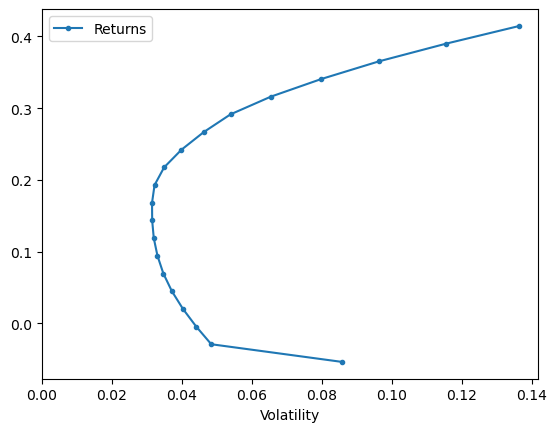

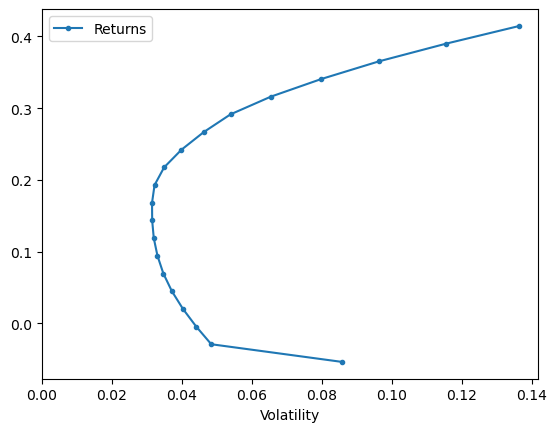

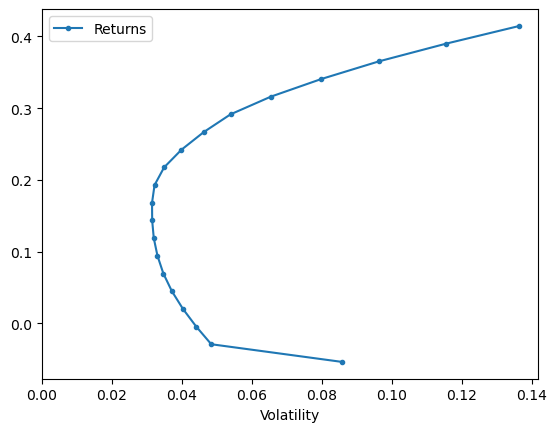

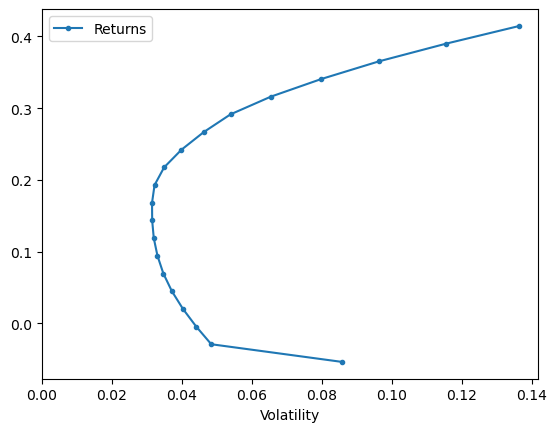

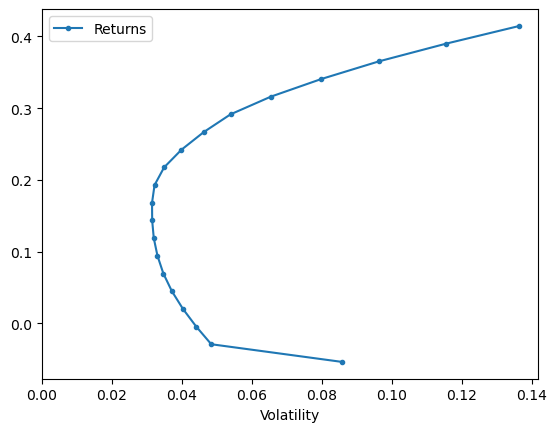

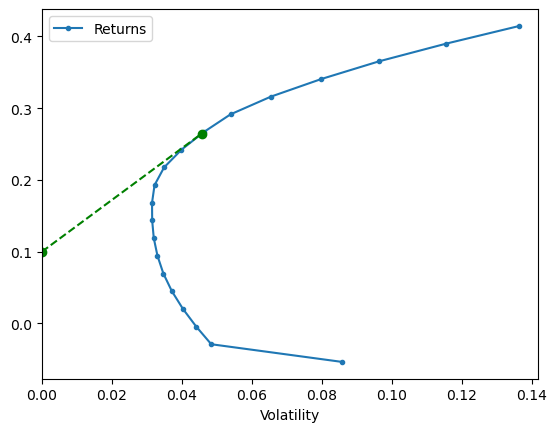

In [14]:
ax = erk.plot_ef(20, er, cov)
ax.set_xlim(left=0)
rf = 0.1
w_msr = msr(rf, er, cov)
r_msr = erk.portfolio_return(w_msr,er)
vol_msr = erk.portfolio_vol(w_msr,cov)

cml_x = [0, vol_msr]
cml_y = [rf, r_msr]
ax.plot(cml_x,cml_y, color="green",marker = "o", linestyle = "dashed")
plt.show()

/Applications/SelfStudy/PythonForPortfolio/Module 2/edhec_risk_kit.py:208: OptimizeWarning: Unknown solver options: drop
  results = minimize(portfolio_vol,
/Applications/SelfStudy/PythonForPortfolio/Module 2/edhec_risk_kit.py:208: OptimizeWarning: Unknown solver options: drop
  results = minimize(portfolio_vol,
/Applications/SelfStudy/PythonForPortfolio/Module 2/edhec_risk_kit.py:208: OptimizeWarning: Unknown solver options: drop
  results = minimize(portfolio_vol,
/Applications/SelfStudy/PythonForPortfolio/Module 2/edhec_risk_kit.py:208: OptimizeWarning: Unknown solver options: drop
  results = minimize(portfolio_vol,
/Applications/SelfStudy/PythonForPortfolio/Module 2/edhec_risk_kit.py:208: OptimizeWarning: Unknown solver options: drop
  results = minimize(portfolio_vol,
/Applications/SelfStudy/PythonForPortfolio/Module 2/edhec_risk_kit.py:208: OptimizeWarning: Unknown solver options: drop
  results = minimize(portfolio_vol,
/Applications/SelfStudy/PythonForPortfolio/Module 2/edhec_

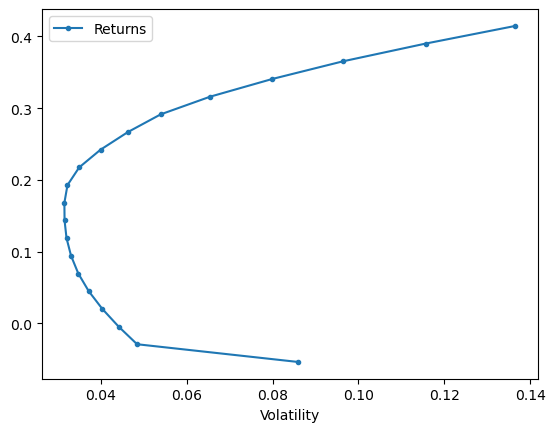

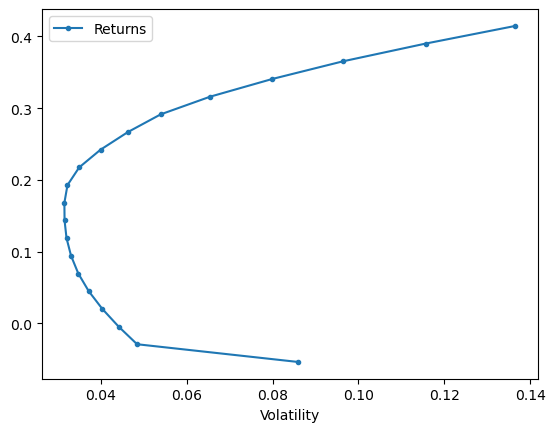

In [16]:
erk.plot_ef(20, er, cov)
plt.show()

/Applications/SelfStudy/PythonForPortfolio/Module 2/edhec_risk_kit.py:208: OptimizeWarning: Unknown solver options: drop
  results = minimize(portfolio_vol,
/Applications/SelfStudy/PythonForPortfolio/Module 2/edhec_risk_kit.py:208: OptimizeWarning: Unknown solver options: drop
  results = minimize(portfolio_vol,
/Applications/SelfStudy/PythonForPortfolio/Module 2/edhec_risk_kit.py:208: OptimizeWarning: Unknown solver options: drop
  results = minimize(portfolio_vol,
/Applications/SelfStudy/PythonForPortfolio/Module 2/edhec_risk_kit.py:208: OptimizeWarning: Unknown solver options: drop
  results = minimize(portfolio_vol,
/Applications/SelfStudy/PythonForPortfolio/Module 2/edhec_risk_kit.py:208: OptimizeWarning: Unknown solver options: drop
  results = minimize(portfolio_vol,
/Applications/SelfStudy/PythonForPortfolio/Module 2/edhec_risk_kit.py:208: OptimizeWarning: Unknown solver options: drop
  results = minimize(portfolio_vol,
/Applications/SelfStudy/PythonForPortfolio/Module 2/edhec_

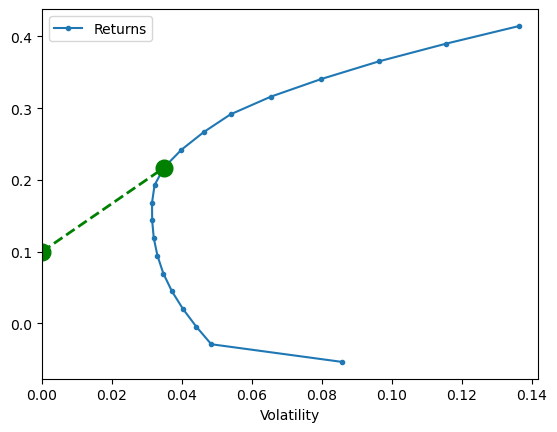

In [18]:
erk.plot_ef(20, er, cov,show_cml = True)
plt.show()